In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score ,confusion_matrix

In [81]:
dftrain = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

In [82]:
dftrain.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [83]:
dftest.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [84]:
dftrain.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [85]:
dftrain.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)
dftest.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [87]:
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null

In [88]:
dftrain.drop(["Cabin"],axis=1,inplace=True)
dftest.drop(["Cabin"],axis=1,inplace=True)

In [89]:
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null

In [90]:
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null

In [91]:
from statistics import mean
dftrain['Age'].fillna((dftrain['Age'].mean()), inplace=True)
dftest['Age'].fillna((dftest['Age'].mean()), inplace=True)

In [92]:
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null

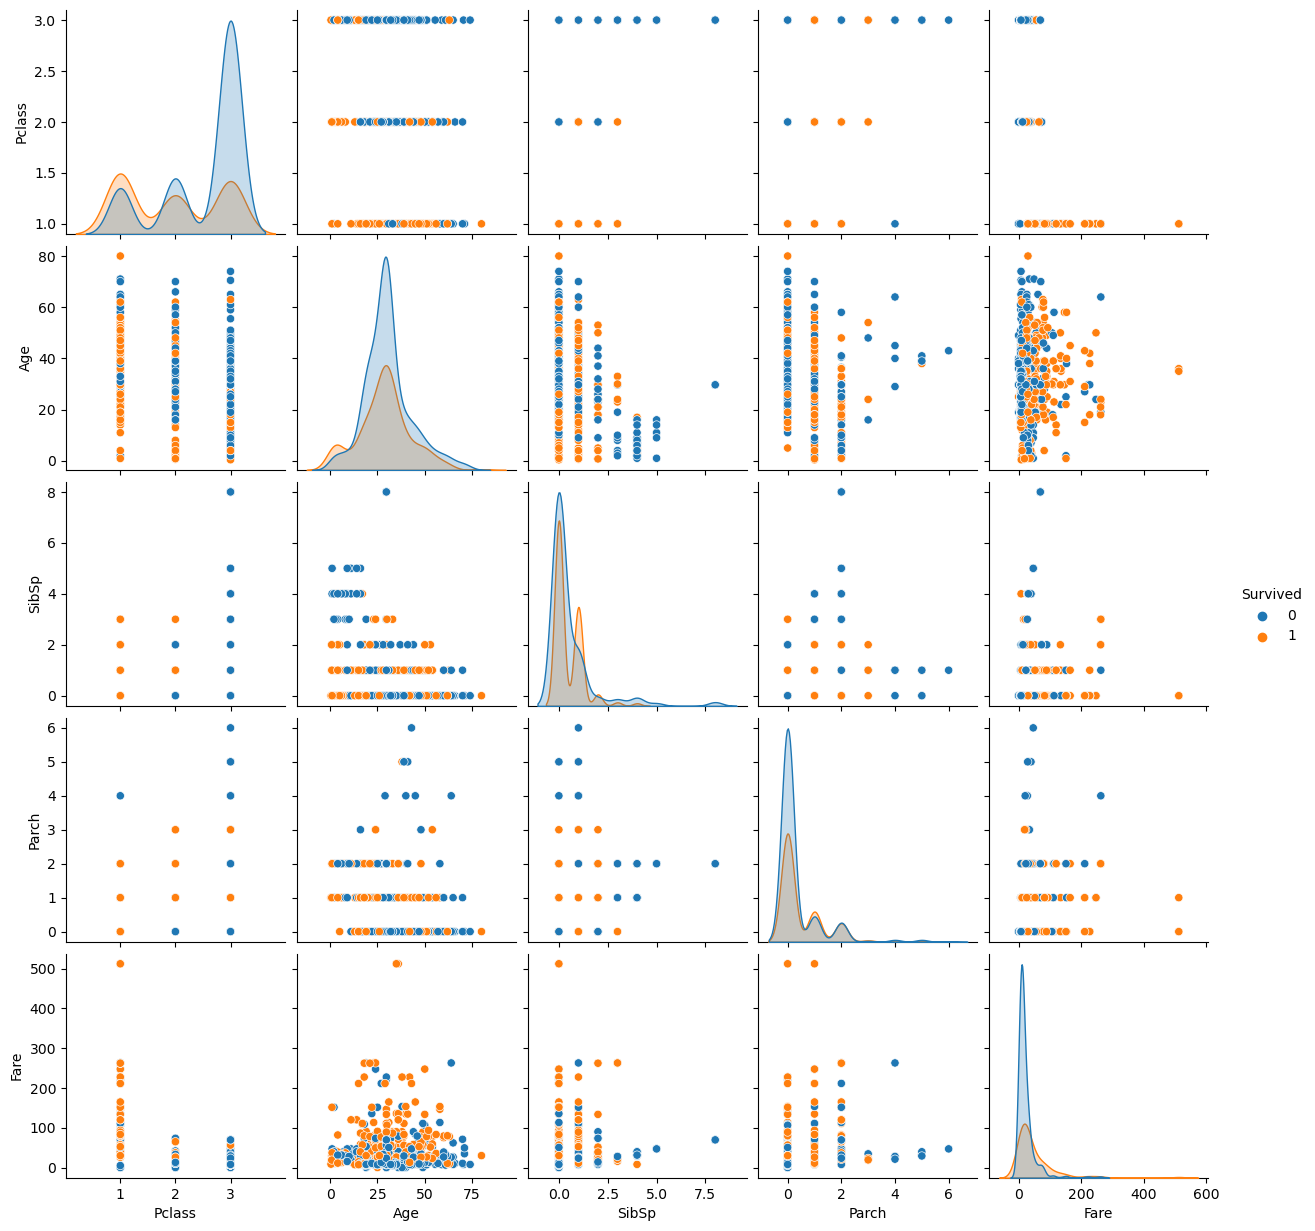

In [12]:
sns.pairplot(dftrain,hue="Survived")

In [13]:
#except Age all other numerical classes has non gaussioan shape 


C:\Users\mvalavi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare2', ylabel='Density'>

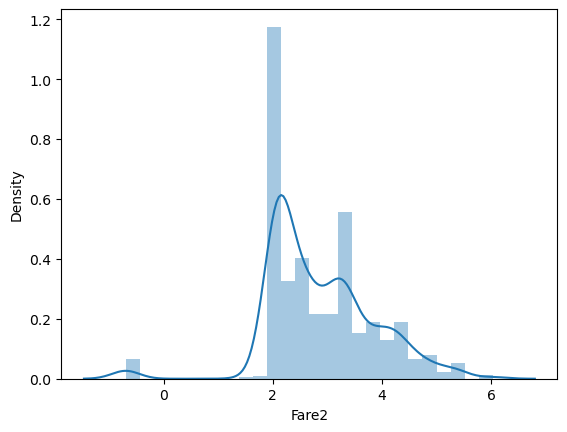

In [93]:
from scipy import stats


#transform the data using box-cox
dftrain["Fare2"], lmbda = stats.boxcox(dftrain["Fare"]+0.5)
#plot the distribution curve
sns.distplot(dftrain["Fare2"])


C:\Users\mvalavi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pclass2', ylabel='Density'>

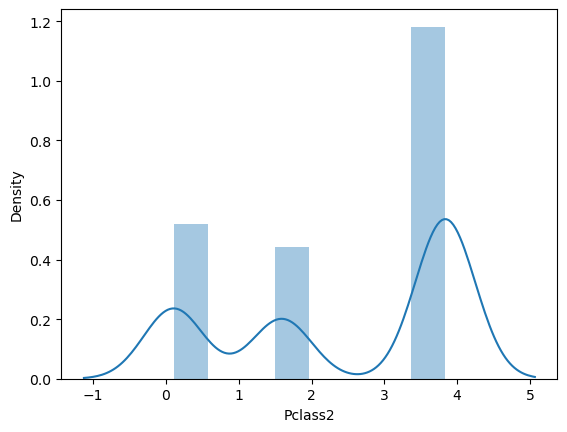

In [94]:
from scipy import stats


#transform the data using box-cox
dftrain["Pclass2"], lmbda = stats.boxcox(dftrain["Pclass"]+0.1)
#plot the distribution curve
sns.distplot(dftrain["Pclass2"])

In [95]:
#just apply it to Fare
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Fare2     891 non-null    float64
 9   Pclass2   891 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 69.7+ KB


In [96]:
dftrain.drop(["Fare"],axis=1,inplace=True)

In [97]:
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
 7   Fare2     891 non-null    float64
 8   Pclass2   891 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 62.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null

In [98]:
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
 7   Fare2     891 non-null    float64
 8   Pclass2   891 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 62.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null

In [100]:
dftrain.drop(["Pclass2"],axis=1,inplace=True)

In [101]:
#checking for outliners

array([[<AxesSubplot:title={'center':'Pclass'}>]], dtype=object)

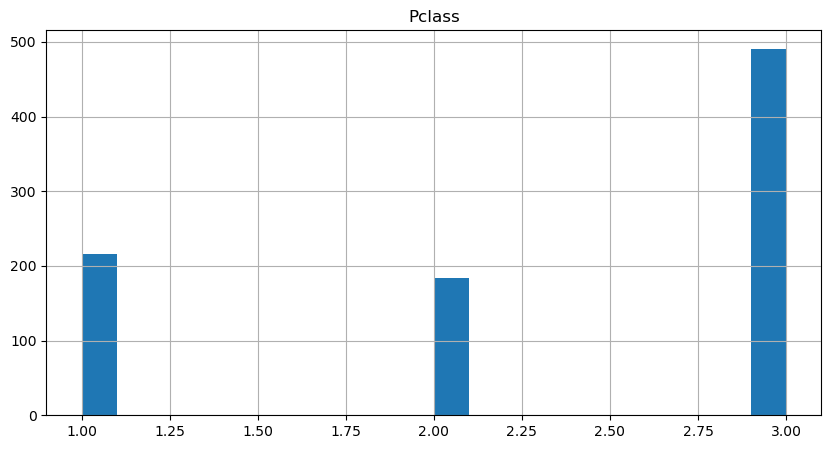

In [102]:
dftrain.hist(column = 'Pclass',bins=20, figsize=(10,5))

array([[<AxesSubplot:title={'center':'SibSp'}>]], dtype=object)

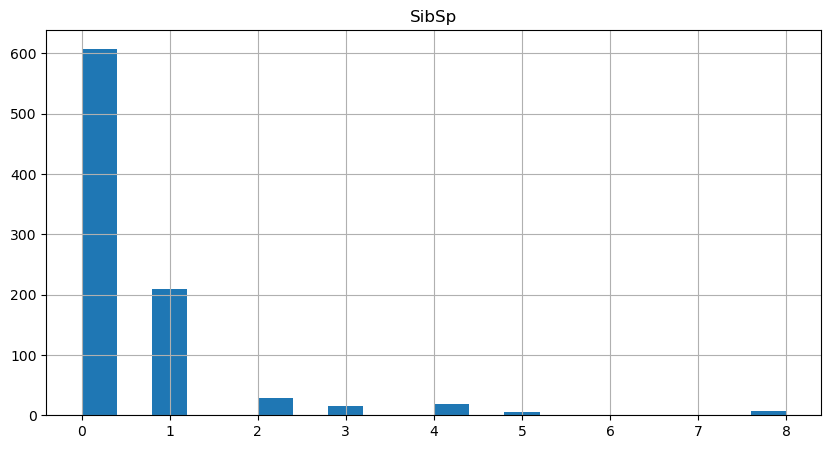

In [103]:
dftrain.hist(column = 'SibSp',bins=20, figsize=(10,5))

array([[<AxesSubplot:title={'center':'Pclass'}>]], dtype=object)

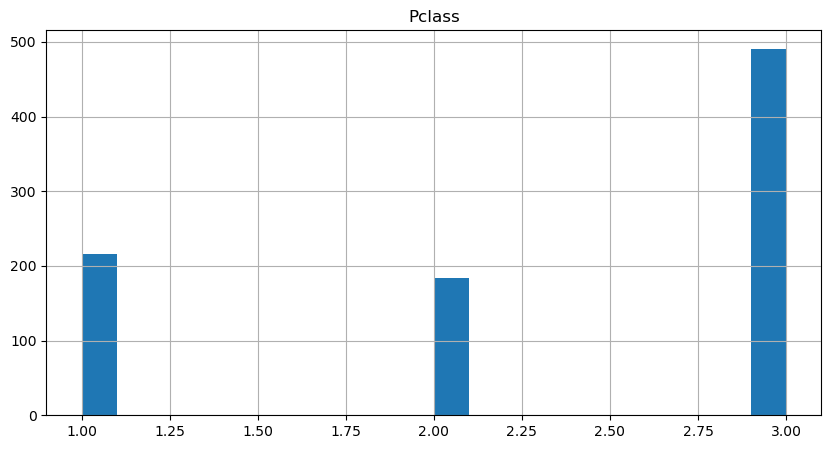

In [104]:
dftrain.hist(column = 'Pclass',bins=20, figsize=(10,5))

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

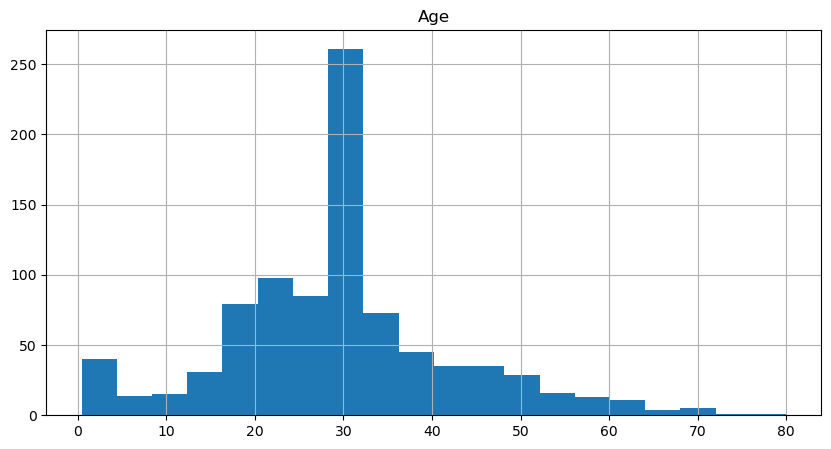

In [105]:
dftrain.hist(column = 'Age',bins=20, figsize=(10,5))

In [106]:
#so there is no ouliners in numeric values

In [107]:
#check effect of for categorial values

<AxesSubplot:xlabel='Sex', ylabel='Count'>

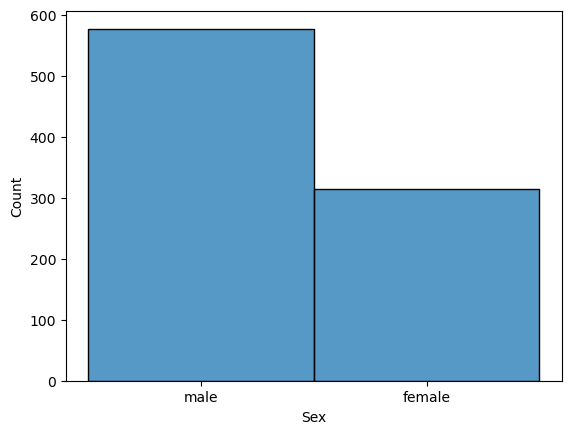

In [108]:
sns.histplot(data=dftrain,x="Sex")

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

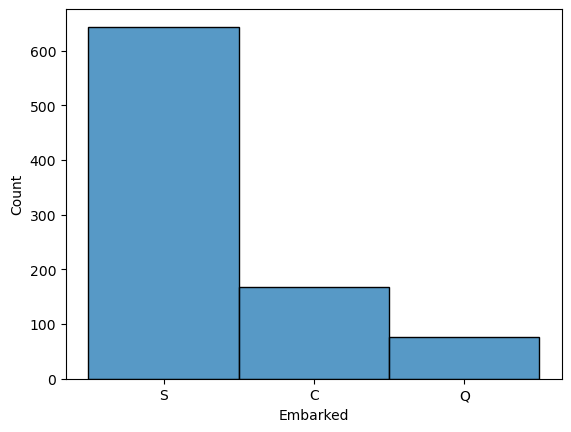

In [109]:
#so sex has effect less check embarked
sns.histplot(data=dftrain,x="Embarked")

In [31]:
#keep this two categorial values

In [32]:
#check for correlation of variable to each other

In [110]:
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
 7   Fare2     891 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null

<AxesSubplot:>

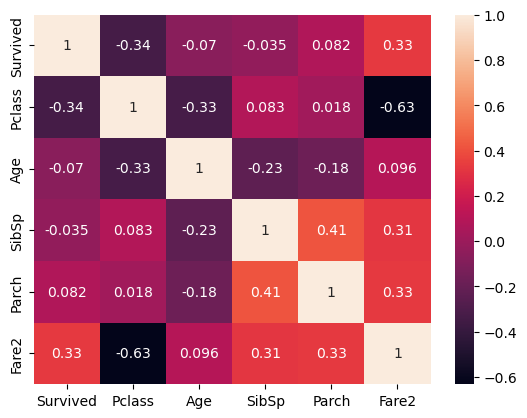

In [111]:
sns.heatmap(dftrain.corr(),annot=True)

In [35]:
#so data are not correlated

In [112]:
dftrain.head()

Survived  Pclass     Sex   Age  SibSp  Parch Embarked     Fare2
0         0       3    male  22.0      1      0        S  2.025210
1         1       1  female  38.0      1      0        C  4.176500
2         1       3  female  26.0      0      0        S  2.106857
3         1       1  female  35.0      1      0        S  3.897136
4         0       3    male  35.0      0      0        S  2.121249

In [113]:
dftest.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S

In [114]:
#deal with categorial value and filling with most repeatable data


dftrain.fillna(dftrain.select_dtypes(include='object').mode().iloc[0], inplace=True)
dftest.fillna(dftest.select_dtypes(include='object').mode().iloc[0], inplace=True)
dftest.fillna(dftest["Fare"].mode().iloc[0], inplace=True)

In [115]:
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
 7   Fare2     891 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null

In [116]:
dftrain.head()

Survived  Pclass     Sex   Age  SibSp  Parch Embarked     Fare2
0         0       3    male  22.0      1      0        S  2.025210
1         1       1  female  38.0      1      0        C  4.176500
2         1       3  female  26.0      0      0        S  2.106857
3         1       1  female  35.0      1      0        S  3.897136
4         0       3    male  35.0      0      0        S  2.121249

In [117]:
dumtrain=pd.get_dummies(dftrain,columns = ["Sex","Embarked"]
               ,drop_first = True)
dumtest=pd.get_dummies(dftest,columns = ["Sex","Embarked"]
               ,drop_first = True)

In [118]:
dumtrain.info()
dumtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare2       891 non-null    float64
 6   Sex_male    891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    f

In [119]:
dumtrain.head()

Survived  Pclass   Age  SibSp  Parch     Fare2  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0  2.025210         1           0   
1         1       1  38.0      1      0  4.176500         0           0   
2         1       3  26.0      0      0  2.106857         0           0   
3         1       1  35.0      1      0  3.897136         0           0   
4         0       3  35.0      0      0  2.121249         1           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1

In [120]:
#Model Construction
from sklearn.preprocessing import StandardScaler
dftrain_outdata = dumtrain.drop(["Survived","Sex_male","Embarked_Q","Embarked_S"], axis=1)
dftrain_outdata2=dumtrain[["Survived","Sex_male","Embarked_Q","Embarked_S"]].copy()
scaler = StandardScaler()
out_dftrain = scaler.fit_transform(dftrain_outdata)

dftest_outdata = dumtest.drop(["Sex_male","Embarked_Q","Embarked_S"], axis=1)
dftest_outdata2=dumtest[["Sex_male","Embarked_Q","Embarked_S"]].copy()
scaler = StandardScaler()
out_dftest = scaler.fit_transform(dftest_outdata)



In [121]:
type(out_dftrain)

numpy.ndarray

In [122]:
dftrain_outdata2.head()

Survived  Sex_male  Embarked_Q  Embarked_S
0         0         1           0           1
1         1         0           0           0
2         1         0           0           1
3         1         0           0           1
4         0         1           0           1

In [123]:
dftest_outdata2.head()

Sex_male  Embarked_Q  Embarked_S
0         1           1           0
1         0           0           1
2         1           1           0
3         1           0           1
4         0           0           1

In [124]:
out_dftrain=pd.DataFrame(out_dftrain,columns=["Age","Pclass","SibSp","Parch","Fare2"])

out_dftest=pd.DataFrame(out_dftest,columns=["Age","Pclass","SibSp","Parch","Fare"])

In [125]:
finaltrain=pd.concat([out_dftrain,dftrain_outdata2],axis=1)

In [126]:
finaltrain.head()

Age    Pclass     SibSp     Parch     Fare2  Survived  Sex_male  \
0  0.827377 -0.592481  0.432793 -0.473674 -0.848792         0         1   
1 -1.566107  0.638789  0.432793 -0.473674  1.322333         1         0   
2  0.827377 -0.284663 -0.474545 -0.473674 -0.766393         1         0   
3 -1.566107  0.407926  0.432793 -0.473674  1.040393         1         0   
4  0.827377  0.407926 -0.474545 -0.473674 -0.751869         0         1   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

In [127]:
dumtest.head()

Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0       3  34.5      0      0   7.8292         1           1           0
1       3  47.0      1      0   7.0000         0           0           1
2       2  62.0      0      0   9.6875         1           1           0
3       3  27.0      0      0   8.6625         1           0           1
4       3  22.0      1      1  12.2875         0           0           1

In [129]:
from sklearn.preprocessing import StandardScaler

out_dftest=pd.DataFrame(out_dftest,columns=["Age","Pclass","SibSp","Parch","Fare"])
finaltest=pd.concat([out_dftest,dftest_outdata2],axis=1)


In [130]:
from sklearn.preprocessing import StandardScaler
dftest_outdata = dumtest.drop(["Sex_male","Embarked_Q","Embarked_S"], axis=1)
dftest_outdata2=dumtest[["Sex_male","Embarked_Q","Embarked_S"]].copy()
scaler = StandardScaler()
out_dftest = scaler.fit_transform(dftest_outdata)

out_dftest=pd.DataFrame(out_dftest,columns=["Age","Pclass","SibSp","Parch","Fare"])
finaltest=pd.concat([out_dftest,dftest_outdata2],axis=1)
finaltest.head()

Age    Pclass     SibSp     Parch      Fare  Sex_male  Embarked_Q  \
0  0.873482  0.334993 -0.499470 -0.400248 -0.497063         1           1   
1  0.873482  1.325530  0.616992 -0.400248 -0.511926         0           0   
2 -0.315819  2.514175 -0.499470 -0.400248 -0.463754         1           1   
3  0.873482 -0.259330 -0.499470 -0.400248 -0.482127         1           0   
4  0.873482 -0.655545  0.616992  0.619896 -0.417151         0           0   

   Embarked_S  
0           0  
1           1  
2           0  
3           1  
4           1

In [131]:
#here the value of pclass and parch and some other feature changed check after first submission what is the reason

In [132]:
#good for understanding descion tree
#https://www.datacamp.com/tutorial/decision-tree-classification-python


In [154]:
X=finaltrain.drop("Survived",axis=1)
y= finaltrain['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

dtr0=DecisionTreeClassifier(max_depth=8)
dtr0.fit(X_train,y_train)

prediction0=dtr0.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix, f1_score


f1_score(prediction0,y_test)

0.7574468085106384

In [173]:
X=finaltrain.drop("Survived",axis=1)
y= finaltrain['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestClassifier

rf0= RandomForestClassifier(max_depth=4, n_estimators=1000,random_state = 42)
rf0.fit(X_train,y_train)

prediction1=rf0.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix, f1_score


f1_score(prediction1,y_test)

0.7511737089201878

In [ ]:
#so untill now the logistic regression give the best F1 score of 0.77